In [1]:
data = read.table("AvTempAtlanta.txt",header=T)
names(data)

[1] "Year"   "Jan"    "Feb"    "Mar"    "Apr"    "May"    "Jun"    "Jul"   
 [9] "Aug"    "Sep"    "Oct"    "Nov"    "Dec"    "Annual"

In [2]:
#column 1 reads as
data[,c(1)]

[1] 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 [16] 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908
 [31] 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923
 [46] 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938
 [61] 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 [76] 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 [91] 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
[106] 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
[121] 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
[136] 2014 2015 2016

In [3]:
#column 1,2 reads as
head(data[,c(1,2)])

Year,Jan
1879,44.3
1880,54.3
1881,40.1
1882,48.8
1883,43.0
1884,35.9


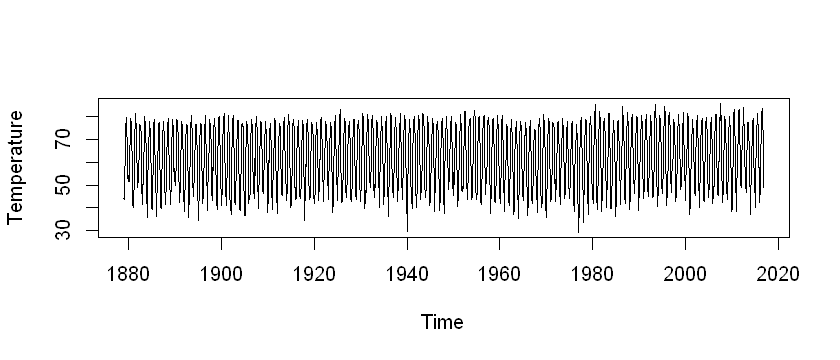

In [4]:
#transpose the data matix and transform to vector
temp = as.vector(t(data[,-c(1,14)]))
temp = ts(temp,start=1879,frequency=12)

options(repr.plot.width=7, repr.plot.height=3)
ts.plot(temp,ylab="Temperature")

# Trend detection

How to know if there is a trend (ie average temperature is on rise?)

## Moving Average

In [5]:
#define a time array from t=1 to length of the time series
time.pts = c(1:length(temp))
#min(time.pts) is 1
time.pts = c(time.pts - min(time.pts))/max(time.pts)
#time.pts is finally scaled down to be in [0,1)
time.pts

[1] 0.0000000000 0.0006038647 0.0012077295 0.0018115942 0.0024154589
   [6] 0.0030193237 0.0036231884 0.0042270531 0.0048309179 0.0054347826
  [11] 0.0060386473 0.0066425121 0.0072463768 0.0078502415 0.0084541063
  [16] 0.0090579710 0.0096618357 0.0102657005 0.0108695652 0.0114734300
  [21] 0.0120772947 0.0126811594 0.0132850242 0.0138888889 0.0144927536
  [26] 0.0150966184 0.0157004831 0.0163043478 0.0169082126 0.0175120773
  [31] 0.0181159420 0.0187198068 0.0193236715 0.0199275362 0.0205314010
  [36] 0.0211352657 0.0217391304 0.0223429952 0.0229468599 0.0235507246
  [41] 0.0241545894 0.0247584541 0.0253623188 0.0259661836 0.0265700483
  [46] 0.0271739130 0.0277777778 0.0283816425 0.0289855072 0.0295893720
  [51] 0.0301932367 0.0307971014 0.0314009662 0.0320048309 0.0326086957
  [56] 0.0332125604 0.0338164251 0.0344202899 0.0350241546 0.0356280193
  [61] 0.0362318841 0.0368357488 0.0374396135 0.0380434783 0.0386473430
  [66] 0.0392512077 0.0398550725 0.0404589372 0.0410628019 0.0416666667
  [71] 0.0422705314 0.0428743961 0.0434782609 0.0440821256 0.0446859903
  [76] 0.0452898551 0.0458937198 0.0464975845 0.0471014493 0.0477053140
  [81] 0.0483091787 0.0489130435 0.0495169082 0.0501207729 0.0507246377
  [86] 0.0513285024 0.0519323671 0.0525362319 0.0531400966 0.0537439614
  [91] 0.0543478261 0.0549516908 0.0555555556 0.0561594203 0.0567632850
  [96] 0.0573671498 0.0579710145 0.0585748792 0.0591787440 0.0597826087
 [101] 0.0603864734 0.0609903382 0.0615942029 0.0621980676 0.0628019324
 [106] 0.0634057971 0.0640096618 0.0646135266 0.0652173913 0.0658212560
 [111] 0.0664251208 0.0670289855 0.0676328502 0.0682367150 0.0688405797
 [116] 0.0694444444 0.0700483092 0.0706521739 0.0712560386 0.0718599034
 [121] 0.0724637681 0.0730676329 0.0736714976 0.0742753623 0.0748792271
 [126] 0.0754830918 0.0760869565 0.0766908213 0.0772946860 0.0778985507
 [131] 0.0785024155 0.0791062802 0.0797101449 0.0803140097 0.0809178744
 [136] 0.0815217391 0.0821256039 0.0827294686 0.0833333333 0.0839371981
 [141] 0.0845410628 0.0851449275 0.0857487923 0.0863526570 0.0869565217
 [146] 0.0875603865 0.0881642512 0.0887681159 0.0893719807 0.0899758454
 [151] 0.0905797101 0.0911835749 0.0917874396 0.0923913043 0.0929951691
 [156] 0.0935990338 0.0942028986 0.0948067633 0.0954106280 0.0960144928
 [161] 0.0966183575 0.0972222222 0.0978260870 0.0984299517 0.0990338164
 [166] 0.0996376812 0.1002415459 0.1008454106 0.1014492754 0.1020531401
 [171] 0.1026570048 0.1032608696 0.1038647343 0.1044685990 0.1050724638
 [176] 0.1056763285 0.1062801932 0.1068840580 0.1074879227 0.1080917874
 [181] 0.1086956522 0.1092995169 0.1099033816 0.1105072464 0.1111111111
 [186] 0.1117149758 0.1123188406 0.1129227053 0.1135265700 0.1141304348
 [191] 0.1147342995 0.1153381643 0.1159420290 0.1165458937 0.1171497585
 [196] 0.1177536232 0.1183574879 0.1189613527 0.1195652174 0.1201690821
 [201] 0.1207729469 0.1213768116 0.1219806763 0.1225845411 0.1231884058
 [206] 0.1237922705 0.1243961353 0.1250000000 0.1256038647 0.1262077295
 [211] 0.1268115942 0.1274154589 0.1280193237 0.1286231884 0.1292270531
 [216] 0.1298309179 0.1304347826 0.1310386473 0.1316425121 0.1322463768
 [221] 0.1328502415 0.1334541063 0.1340579710 0.1346618357 0.1352657005
 [226] 0.1358695652 0.1364734300 0.1370772947 0.1376811594 0.1382850242
 [231] 0.1388888889 0.1394927536 0.1400966184 0.1407004831 0.1413043478
 [236] 0.1419082126 0.1425120773 0.1431159420 0.1437198068 0.1443236715
 [241] 0.1449275362 0.1455314010 0.1461352657 0.1467391304 0.1473429952
 [246] 0.1479468599 0.1485507246 0.1491545894 0.1497584541 0.1503623188
 [251] 0.1509661836 0.1515700483 0.1521739130 0.1527777778 0.1533816425
 [256] 0.1539855072 0.1545893720 0.1551932367 0.1557971014 0.1564009662
 [261] 0.1570048309 0.1576086957 0.1582125604 0.1588164251 0.1594202899
 [266] 0.1600241546 0.1606280193 0.1612318841 0.1618357488 0.1624396135
 [271] 0.1630434783 0.1636473430 0.1642512077 0.1648550725 0.1654589372
 [276] 0.1660628019 0.1666666667 0.16727053

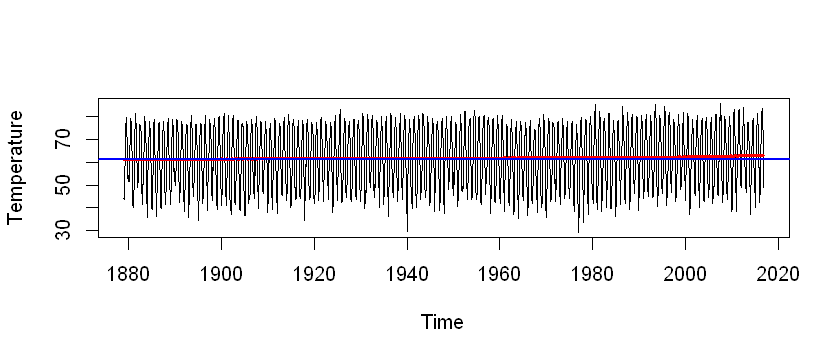

In [6]:
## Fit a moving average: Note MA is special case of Kernel regression when constant kernel is used (here named 'Box') 
mav.fit = ksmooth(time.pts, temp, kernel = "box")
# Create a time series for above
temp.fit.mav = ts(mav.fit$y,start=1879,frequency=12)
#plot
ts.plot(temp,ylab="Temperature")
lines(temp.fit.mav,lwd=3,col="red")
abline(temp.fit.mav[1],0,lwd=2,col="blue")                    #temp.fit.mav[1] is the first observation in the ts

Hard to see if trend

## Parametric regression

In [7]:
## Fit a parametric quadraric polynomial
x1 = time.pts
x2 = time.pts^2
lm.fit = lm(temp~x1+x2)
summary(lm.fit)


Call:
lm(formula = temp ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.770 -11.886   0.514  13.418  22.942 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.4247     0.9841  62.420   <2e-16 ***
x1           -1.5723     4.5481  -0.346    0.730    
x2            3.4937     4.4062   0.793    0.428    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.36 on 1653 degrees of freedom
Multiple R-squared:  0.002098,	Adjusted R-squared:  0.0008903 
F-statistic: 1.737 on 2 and 1653 DF,  p-value: 0.1763


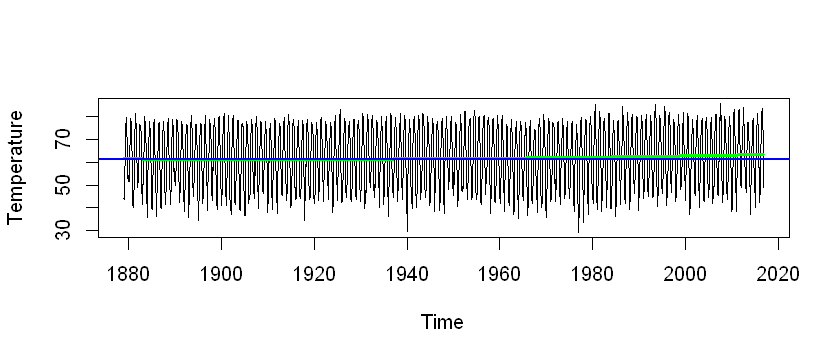

In [8]:
temp.fit.lm = ts(fitted(lm.fit),start=1879,frequency=12)
ts.plot(temp,ylab="Temperature")
lines(temp.fit.lm,lwd=3,col="green")
abline(temp.fit.mav[1],0,lwd=2,col="blue")

We see there are insignificant parameters but these may be due to high residuals resulting from the linear model due to seasonality.

## Non Parametric Regression

Warning message:
"package 'mgcv' was built under R version 3.6.3"Loading required package: nlme
Warning message:
"package 'nlme' was built under R version 3.6.3"This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.


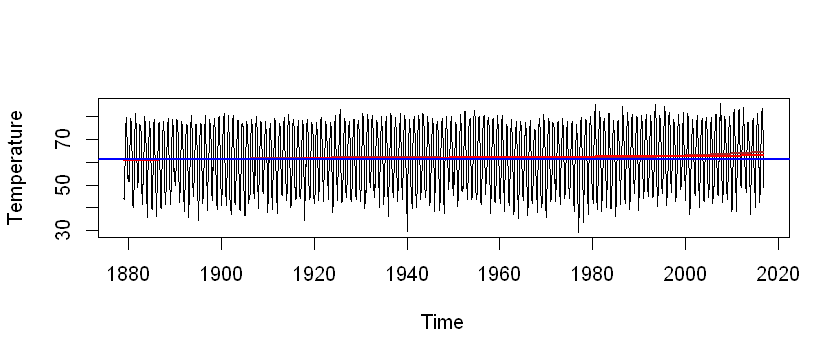

In [9]:
## Fit a trend using non-parametric regression
## Local Polynomial Trend Estimation
loc.fit = loess(temp~time.pts)
temp.fit.loc = ts(fitted(loc.fit),start=1879,frequency=12)

## Splines Trend Estimation
#Note GAM like splines are similar to Local polynomial or Kernel regressions and 
#provide both inference and low bias that is ability to fit complex functions

library(mgcv)
gam.fit = gam(temp~s(time.pts))
temp.fit.gam = ts(fitted(gam.fit),start=1879,frequency=12)
## Is there a trend? 
ts.plot(temp,ylab="Temperature")
lines(temp.fit.loc,lwd=2,col="brown")
lines(temp.fit.gam,lwd=2,col="red")
abline(temp.fit.loc[1],0,lwd=2,col="blue")

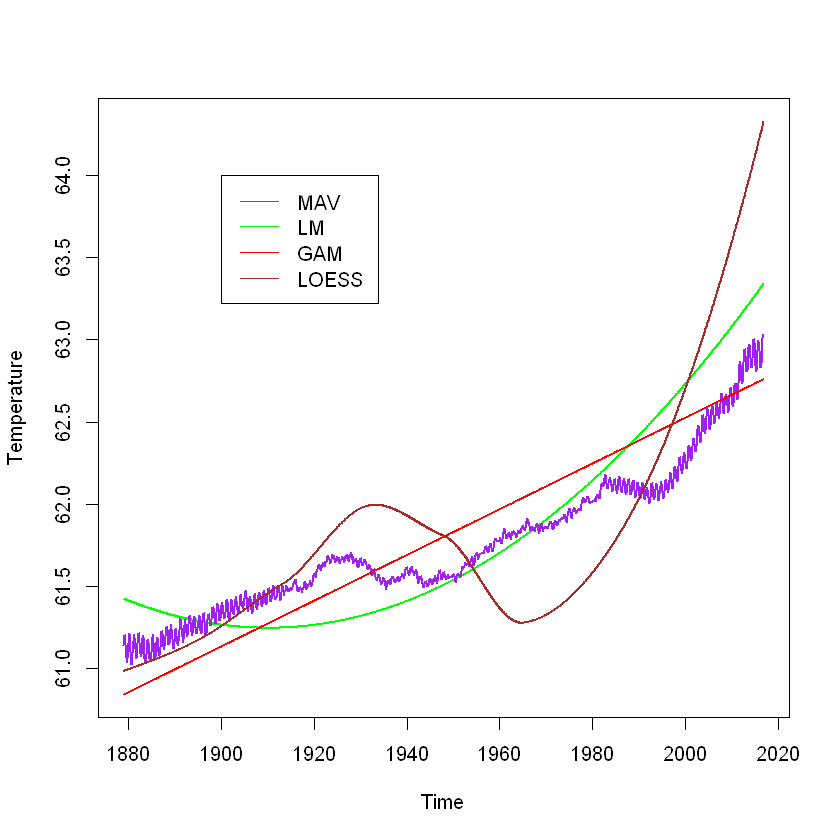

In [10]:
options(repr.plot.width=7, repr.plot.height=7)
## Compare all estimated trends
all.val = c(temp.fit.mav,temp.fit.lm,temp.fit.gam,temp.fit.loc)
ylim= c(min(all.val),max(all.val))
ts.plot(temp.fit.lm,lwd=2,col="green",ylim=ylim,ylab="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
lines(temp.fit.gam,lwd=2,col="red")
lines(temp.fit.loc,lwd=2,col="brown")
legend(x=1900,y=64,legend=c("MAV","LM","GAM","LOESS"),lty = 1, col=c("purple","green","red","brown"))

### From all 4 regressions we see some increase in temperature hence a positive trend.

# Seasonality

## ANOVA (for dummy variable for months)

In [11]:
#library(devtools)
#install_url('https://cran.r-project.org/src/contrib/Archive/TSA/TSA_1.2.1.tar.gz')

In [12]:
library(TSA)
month = season(temp)
month


Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar



[1] January   February  March     April     May       June      July     
   [8] August    September October   November  December  January   February 
  [15] March     April     May       June      July      August    September
  [22] October   November  December  January   February  March     April    
  [29] May       June      July      August    September October   November 
  [36] December  January   February  March     April     May       June     
  [43] July      August    September October   November  December  January  
  [50] February  March     April     May       June      July      August   
  [57] September October   November  December  January   February  March    
  [64] April     May       June      July      August    September October  
  [71] November  December  January   February  March     April     May      
  [78] June      July      August    September October   November  December 
  [85] January   February  March     April     May       June      July     
  [92] August    September October   November  December  January   February 
  [99] March     April     May       June      July      August    September
 [106] October   November  December  January   February  March     April    
 [113] May       June      July      August    September October   November 
 [120] December  January   February  March     April     May       June     
 [127] July      August    September October   November  December  January  
 [134] February  March     April     May       June      July      August   
 [141] September October   November  December  January   February  March    
 [148] April     May       June      July      August    September October  
 [155] November  December  January   February  March     April     May      
 [162] June      July      August    September October   November  December 
 [169] January   February  March     April     May       June      July     
 [176] August    September October   November  December  January   February 
 [183] March     April     May       June      July      August    September
 [190] October   November  December  January   February  March     April    
 [197] May       June      July      August    September October   November 
 [204] December  January   February  March     April     May       June     
 [211] July      August    September October   November  December  January  
 [218] February  March     April     May       June      July      August   
 [225] September October   November  December  January   February  March    
 [232] April     May       June      July      August    September October  
 [239] November  December  January   February  March     April     May      
 [246] June      July      August    September October   November  December 
 [253] January   February  March     April     May       June      July     
 [260] August    September October   November  December  January   February 
 [267] March     April     May       June      July      August    September
 [274] October   November  December  January   February  March     April    
 [281] May       June      July      August    September October   November 
 [288] December  January   February  March     April     May       June     
 [295] July      August    September October   November  December  January  
 [302] February  March     April     May       June      July      August   
 [309] September October   November  December  January   February  March    
 [316] April     May       June      July      August    September October  
 [323] November  December  January   February  March     April     May      
 [330] June      July      August    September October   November  December 
 [337] January   February  March     April     May       June      July     
 [344] August    September October   November  December  January   February 
 [351] March     April     May       June      July      August    September
 [358] October   November  December  January   February  March     April    

In [13]:
## Drop January (model with intercept)
model1 = lm(temp~month)
summary(model1)
## All seasonal mean effects (model without intercept)
model2 = lm(temp~month-1)
summary(model2)


Call:
lm(formula = temp ~ month)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9072  -1.9636  -0.0986   1.9437  12.5275 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     43.2072     0.2725 158.534  < 2e-16 ***
monthFebruary    2.7514     0.3854   7.139 1.41e-12 ***
monthMarch      10.0232     0.3854  26.005  < 2e-16 ***
monthApril      18.4014     0.3854  47.742  < 2e-16 ***
monthMay        26.5623     0.3854  68.916  < 2e-16 ***
monthJune       33.4913     0.3854  86.893  < 2e-16 ***
monthJuly       35.7978     0.3854  92.877  < 2e-16 ***
monthAugust     35.0630     0.3854  90.971  < 2e-16 ***
monthSeptember  30.0913     0.3854  78.071  < 2e-16 ***
monthOctober    19.7543     0.3854  51.252  < 2e-16 ***
monthNovember    9.3420     0.3854  24.238  < 2e-16 ***
monthDecember    1.8652     0.3854   4.839 1.43e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.202 on 1644 degrees of f


Call:
lm(formula = temp ~ month - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9072  -1.9636  -0.0986   1.9437  12.5275 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
monthJanuary    43.2072     0.2725   158.5   <2e-16 ***
monthFebruary   45.9587     0.2725   168.6   <2e-16 ***
monthMarch      53.2304     0.2725   195.3   <2e-16 ***
monthApril      61.6087     0.2725   226.1   <2e-16 ***
monthMay        69.7696     0.2725   256.0   <2e-16 ***
monthJune       76.6986     0.2725   281.4   <2e-16 ***
monthJuly       79.0051     0.2725   289.9   <2e-16 ***
monthAugust     78.2703     0.2725   287.2   <2e-16 ***
monthSeptember  73.2986     0.2725   268.9   <2e-16 ***
monthOctober    62.9616     0.2725   231.0   <2e-16 ***
monthNovember   52.5493     0.2725   192.8   <2e-16 ***
monthDecember   45.0725     0.2725   165.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.202 on 1644 degrees 

Both models are significant.

## Cos-Sine model

In [14]:
har=harmonic(temp,1)
head(har)

cos(2*pi*t),sin(2*pi*t)
1.000000e+00,-1.177855e-12
8.660254e-01,5.000000e-01
5.000000e-01,8.660254e-01
1.032206e-13,1.000000e+00
-5.000000e-01,8.660254e-01
-8.660254e-01,5.000000e-01


In [15]:
model3=lm(temp~har)
summary(model3)


Call:
lm(formula = temp ~ har)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2003  -2.0059  -0.2022   2.0005  12.4493 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     61.80254    0.08133  759.870  < 2e-16 ***
harcos(2*pi*t) -18.30228    0.11502 -159.119  < 2e-16 ***
harsin(2*pi*t)  -0.69366    0.11502   -6.031 2.01e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.31 on 1653 degrees of freedom
Multiple R-squared:  0.9388,	Adjusted R-squared:  0.9387 
F-statistic: 1.268e+04 on 2 and 1653 DF,  p-value: < 2.2e-16


Note the coefficients estimated

In [16]:
har2=harmonic(temp,2)
head(har2)

cos(2*pi*t),cos(4*pi*t),sin(2*pi*t),sin(4*pi*t)
1.000000e+00,1.0,-1.177855e-12,-2.355710e-12
8.660254e-01,0.5,5.000000e-01,8.660254e-01
5.000000e-01,-0.5,8.660254e-01,8.660254e-01
1.032206e-13,-1.0,1.000000e+00,2.064411e-13
-5.000000e-01,-0.5,8.660254e-01,-8.660254e-01
-8.660254e-01,0.5,5.000000e-01,-8.660254e-01


In [17]:
model4=lm(temp~har2)
summary(model4)


Call:
lm(formula = temp ~ har2)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5699  -2.0031  -0.1105   1.9524  12.5301 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      61.80254    0.07888  783.490  < 2e-16 ***
har2cos(2*pi*t) -18.30228    0.11155 -164.065  < 2e-16 ***
har2cos(4*pi*t)  -0.63031    0.11155   -5.650 1.88e-08 ***
har2sin(2*pi*t)  -0.69366    0.11155   -6.218 6.36e-10 ***
har2sin(4*pi*t)   0.96246    0.11155    8.628  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.21 on 1651 degrees of freedom
Multiple R-squared:  0.9425,	Adjusted R-squared:  0.9424 
F-statistic:  6766 on 4 and 1651 DF,  p-value: < 2.2e-16


Both models are significant.

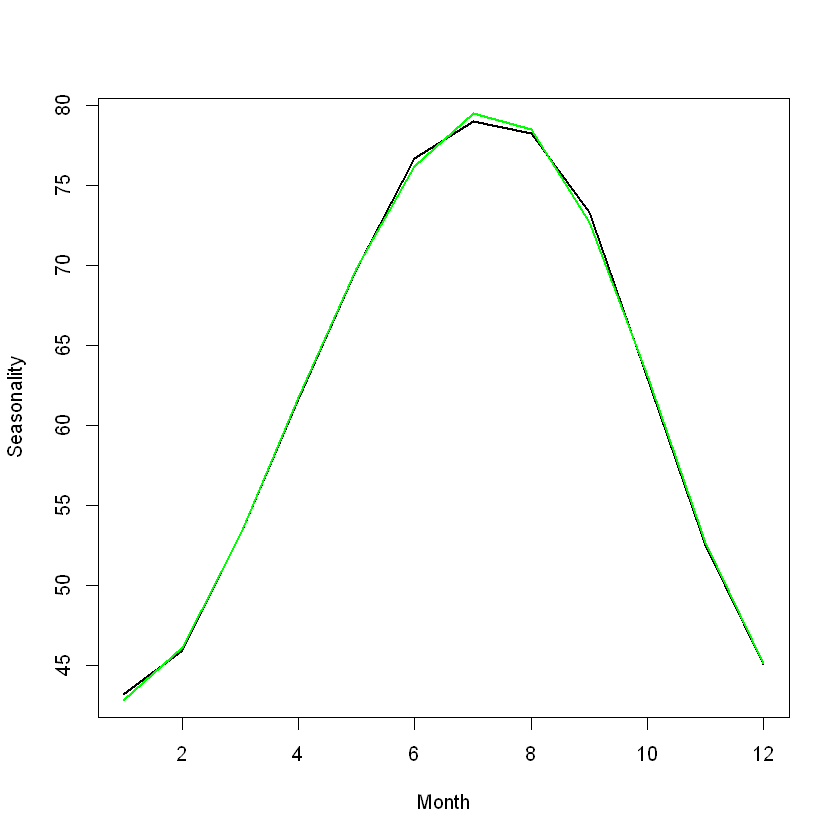

In [18]:
## Compare Seasonality Estimates
## Seasonal Means Model
st1 = coef(model2)
## Cos-Sin Model
st2 = fitted(model4)[1:12]
plot(1:12,st1,lwd=2,type="l",xlab="Month",ylab="Seasonality")
lines(1:12,st2,lwd=2, col="green")

# ################ TREND AND SEASONALITY ESTIMATION #########################


## Linear regression

In [19]:
## Fit a parametric model for both trend and seasonality
x1 = time.pts
x2 = time.pts^2
har2=harmonic(temp,2)
lm.fit = lm(temp~x1+x2+har2)
summary(lm.fit)
dif.fit.lm = ts((temp-fitted(lm.fit)),start=1879,frequency=12)


Call:
lm(formula = temp ~ x1 + x2 + har2)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8242  -1.9505  -0.1554   1.9744  12.7916 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      61.4620     0.2324  264.456  < 2e-16 ***
x1               -1.6526     1.0741   -1.538 0.124119    
x2                3.5021     1.0406    3.365 0.000782 ***
har2cos(2*pi*t) -18.3012     0.1097 -166.844  < 2e-16 ***
har2cos(4*pi*t)  -0.6292     0.1097   -5.736 1.15e-08 ***
har2sin(2*pi*t)  -0.6895     0.1097   -6.286 4.17e-10 ***
har2sin(4*pi*t)   0.9644     0.1097    8.792  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.156 on 1649 degrees of freedom
Multiple R-squared:  0.9445,	Adjusted R-squared:  0.9443 
F-statistic:  4675 on 6 and 1649 DF,  p-value: < 2.2e-16


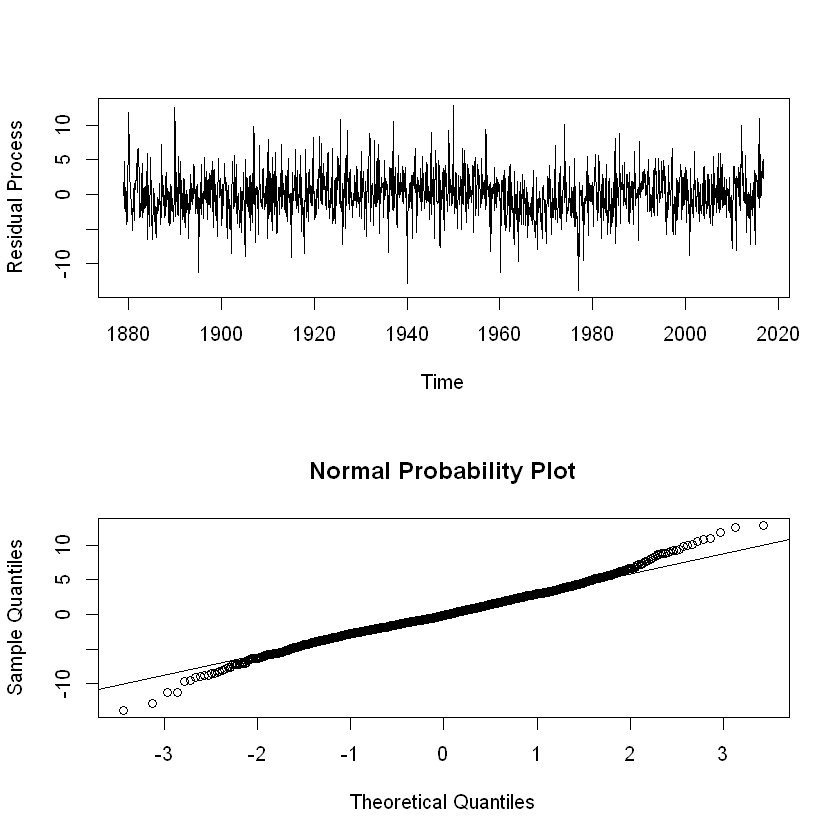

In [20]:
par(mfrow=c(2,1))
ts.plot(dif.fit.lm,ylab="Residual Process")
qqnorm(dif.fit.lm, main= "Normal Probability Plot")
qqline(dif.fit.lm)


## Non parametric GAM

Note GAM provide both inference and low bias that is ability to fit complex functions

In [21]:
## Fit a non-parametric model for trend and linear model for seasonality
gam.fit = gam(temp~s(time.pts)+har2)
dif.fit.gam = ts((temp-fitted(gam.fit)),start=1879,frequency=12)
summary(gam.fit)


Family: gaussian 
Link function: identity 

Formula:
temp ~ s(time.pts) + har2

Parametric coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      61.80254    0.07598  813.366  < 2e-16 ***
har2cos(2*pi*t) -18.30073    0.10746 -170.306  < 2e-16 ***
har2cos(4*pi*t)  -0.62870    0.10746   -5.851 5.90e-09 ***
har2sin(2*pi*t)  -0.68755    0.10747   -6.398 2.05e-10 ***
har2sin(4*pi*t)   0.96529    0.10746    8.983  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
             edf Ref.df    F p-value    
s(time.pts) 8.65  8.965 14.6  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.947   Deviance explained = 94.7%
GCV = 9.6404  Scale est. = 9.5609    n = 1656

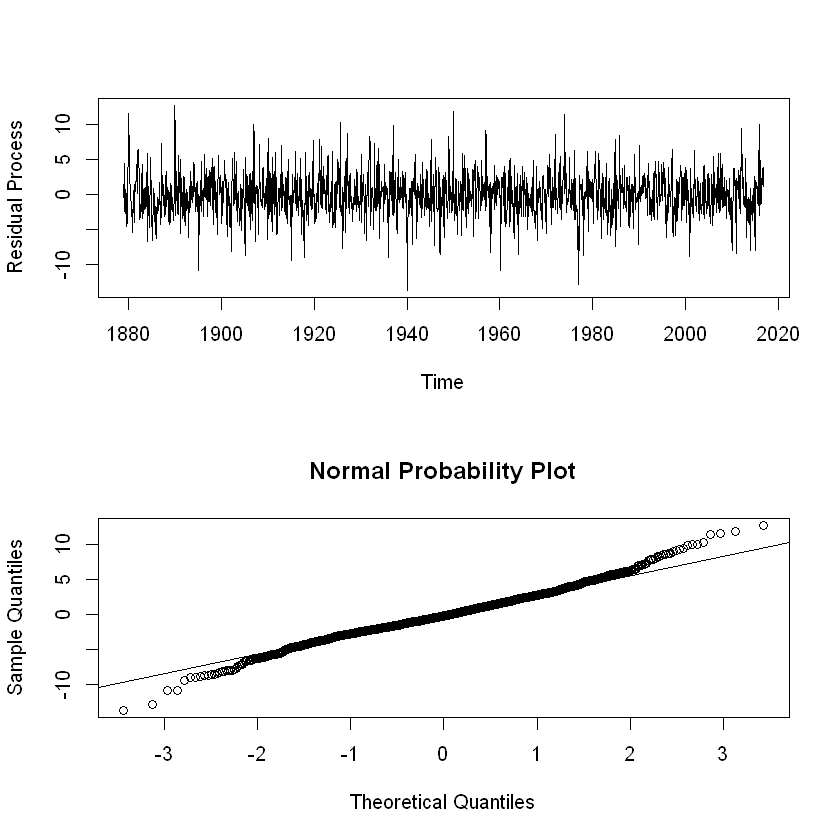

In [22]:
par(mfrow=c(2,1))
ts.plot(dif.fit.gam,ylab="Residual Process")
qqnorm(dif.fit.gam, main= "Normal Probability Plot")
qqline(dif.fit.gam)


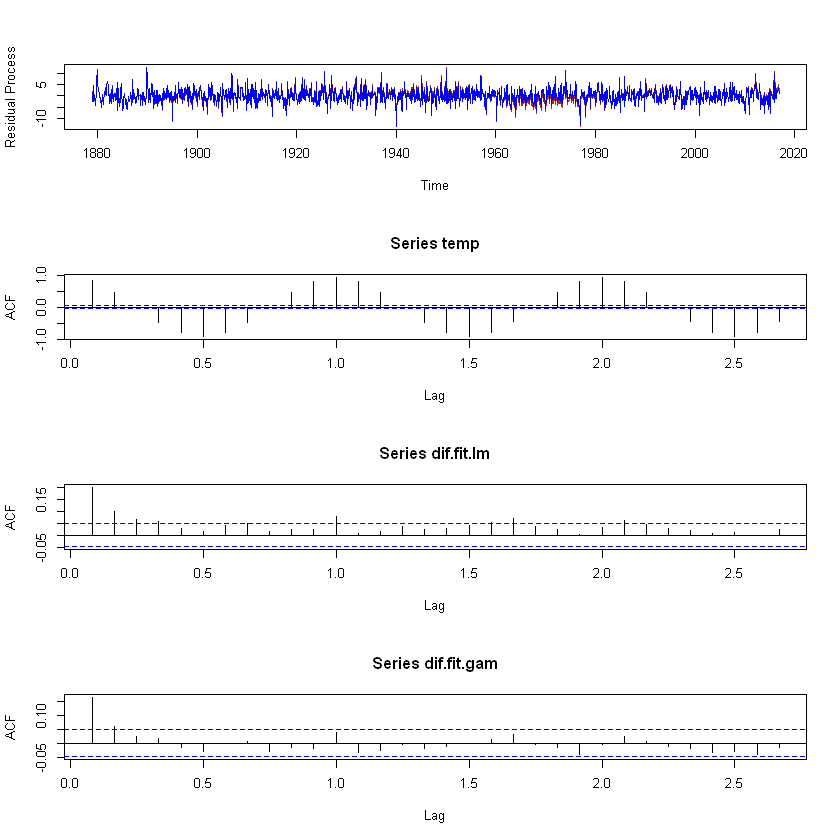

In [23]:
par(mfrow=c(4,1))
## Compare approaches 
ts.plot(dif.fit.lm,ylab="Residual Process",col="brown")
lines(dif.fit.gam,col="blue")
acf(temp)
acf(dif.fit.lm)
acf(dif.fit.gam)

<li>clearly ACF of temp shows seasonality but trend is not seen as its very small (but its there)
<li>ACF of linear model has removed most seasonality though some cyclical pattern observable
<li>Non parametric regression has removed all seasonality </li>
 Though fast decaying ACFs imply stationarity these dont guarantee that the residuals series(detrended series) is stationary: for that use unit root tests.